In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("WC_AT.csv")

In [3]:
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [4]:
data.tail()

,Waist,AT
104,100.1,124.0
105,93.3,62.2
106,101.8,133.0
107,107.9,208.0
108,108.5,208.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [6]:
data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


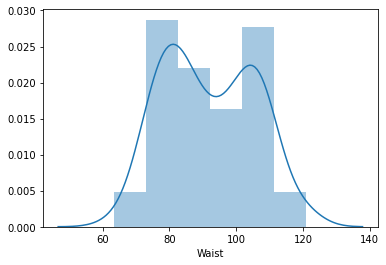

In [10]:
import seaborn as sns
sns.distplot(data["Waist"])

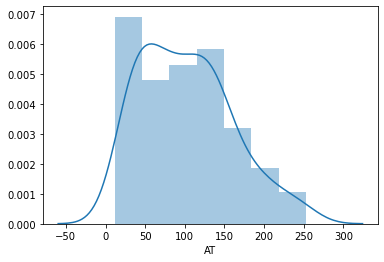

In [11]:
sns.distplot(data["AT"])

In [12]:
import statsmodels.formula.api as smf

In [13]:
model=smf.ols("AT~Waist", data=data).fit()

In [14]:
model

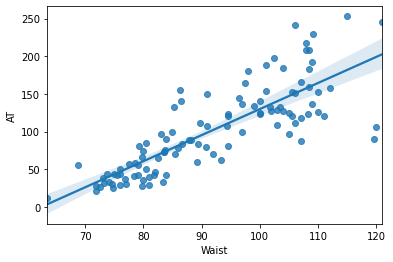

In [15]:
sns.regplot(x="Waist", y="AT", data=data);

In [16]:
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Sat, 24 Oct 2020   Prob (F-statistic):           1.62e-27
Time:                        17:37:38   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
print(model.tvalues, "\n", model.pvalues)

Intercept    -9.909103
Waist        14.740376
dtype: float64 
 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [21]:
model.rsquared

0.670036893052843

In [22]:
model.rsquared_adj

0.6669531256981966

In [24]:
AT_70=-215.981488+(3.458859*70)
print(AT_70)

26.138641999999976


In [25]:
AT_65=-215.981488+(3.458859*65)
print(AT_65)

8.84434699999997


In [28]:
new_data=pd.Series([46,87,100,96])
new_data

0     46
1     87
2    100
3     96
dtype: int64

In [31]:
data_predict=pd.DataFrame(new_data,columns=["Waist"])

In [32]:
data_predict

,Waist
0,46
1,87
2,100
3,96


In [33]:
model.predict(data_predict)

0    -56.873956
1     84.939279
2    129.904451
3    116.069014
dtype: float64